In [134]:
%pylab inline

import os
import glob
import numpy as np
import astropy.table as astTable
import matplotlib.pyplot as plt
import xlens
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial import KDTree

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [142]:
B= [8279,  8280,  8281,  8282,  8283,  8284,  8285,  8520,  8521,
        8522,  8523,  8524,  8525,  8526,  8762,  8763,  8764,  8765,
        8766,  8767,  8768,  9004,  9005,  9006,  9007,  9008,  9009,
        9010,  9071,  9073,  9074,  9075,  9076,  9079,  9080,  9082,
        9083,  9085,  9087,  9091,  9096,  9097,  9098,  9102,  9103,
        9105,  9106,  9107,  9109,  9110,  9113,  9116,  9117,  9118,
        9121,  9122,  9123,  9125,  9131,  9133,  9226,  9227,  9228,
        9229,  9230,  9231,  9232,  9233,  9234,  9235,  9236,  9237,
        9238,  9239,  9240,  9241,  9242,  9243,  9244,  9245,  9246,
        9247,  9248,  9249,  9250,  9251,  9252,  9313,  9314,  9315,
        9316,  9317,  9318,  9319,  9320,  9321,  9322,  9323,  9324,
        9325,  9326,  9327,  9328,  9329,  9330,  9331,  9332,  9333,
        9334,  9335,  9336,  9337,  9338,  9339,  9340,  9341,  9342,
        9343,  9344,  9345,  9346,  9347,  9348,  9349,  9350,  9351,
        9352,  9353,  9354,  9355,  9356,  9357,  9358,  9359,  9360,
        9361,  9362,  9363,  9364,  9365,  9366,  9367,  9368,  9369,
        9370,  9371,  9372,  9373,  9374,  9375,  9376,  9377,  9378,
        9449,  9450,  9451,  9452,  9453,  9454,  9455,  9456,  9457,
        9458,  9459,  9460,  9461,  9462,  9463,  9464,  9465,  9466,
        9467,  9468,  9469,  9470,  9471,  9472,  9473,  9474,  9475,
        9476,  9477,  9478,  9479,  9480,  9481,  9482,  9483,  9484,
        9485,  9486,  9487,  9488,  9489,  9490,  9491,  9492,  9493,
        9494,  9495,  9556,  9557,  9558,  9559,  9560,  9561,  9562,
        9563,  9564,  9565,  9566,  9567,  9568,  9569,  9570,  9571,
        9572,  9573,  9574,  9575,  9576,  9577,  9578,  9579,  9580,
        9581,  9582,  9583,  9584,  9585,  9586,  9587,  9588,  9589,
        9590,  9591,  9592,  9593,  9594,  9595,  9596,  9597,  9598,
        9599,  9600,  9601,  9602,  9603,  9604,  9605,  9606,  9607,
        9608,  9609,  9610,  9611,  9612,  9613,  9614,  9615,  9616,
        9617,  9618,  9619,  9620,  9621,  9692,  9693,  9694,  9695,
        9696,  9697,  9698,  9699,  9700,  9701,  9702,  9703,  9704,
        9705,  9706,  9707,  9708,  9709,  9710,  9711,  9712,  9713,
        9714,  9715,  9716,  9717,  9718,  9719,  9720,  9721,  9722,
        9723,  9724,  9725,  9726,  9727,  9728,  9729,  9730,  9731,
        9732,  9733,  9734,  9735,  9736,  9737,  9738,  9799,  9800,
        9801,  9802,  9803,  9804,  9805,  9806,  9807,  9808,  9809,
        9810,  9811,  9812,  9813,  9814,  9815,  9816,  9817,  9818,
        9819,  9820,  9821,  9822,  9823,  9824,  9825,  9826,  9827,
        9828,  9829,  9830,  9831,  9832,  9833,  9834,  9835,  9836,
        9837,  9838,  9839,  9840,  9841,  9842,  9843,  9844,  9845,
        9846,  9847,  9848,  9849,  9850,  9851,  9852,  9853,  9854,
        9855,  9856,  9857,  9858,  9859,  9860,  9861,  9862,  9863,
        9864,  9934,  9935,  9936,  9937,  9938,  9939,  9940,  9941,
        9942,  9943,  9944,  9945,  9946,  9947,  9948,  9949,  9950,
        9951,  9952,  9953,  9954,  9955,  9956,  9957,  9958,  9959,
        9960,  9961,  9962,  9963,  9964,  9965,  9966,  9967,  9968,
        9969,  9970,  9971,  9972,  9973,  9974,  9975,  9976,  9977,
        9978,  9979,  9980, 10040, 10041, 10042, 10043, 10044, 10045,
       10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054,
       10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062, 10063,
       10064, 10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072,
       10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080, 10081,
       10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089, 10090,
       10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099,
       10100, 10101, 10102, 10103, 10104, 10105, 10106, 10176, 10177,
       10178, 10179, 10180, 10181, 10182, 10183, 10184, 10185, 10186,
       10187, 10188, 10189, 10190, 10191, 10192, 10193, 10194, 10195,
       10196, 10197, 10198, 10199, 10200, 10201, 10202, 10203, 10204,
       10205, 10206, 10207, 10208, 10209, 10210, 10211, 10212, 10213,
       10214, 10215, 10216, 10219, 10221, 10222, 10284, 10285, 10286,
       10290, 10291, 10292, 10293, 10295, 10296, 10298, 10300, 10301,
       10303, 10304, 10305, 10308, 10309, 10311, 10313, 10315, 10316,
       10317, 10319, 10320, 10321, 10322, 10323, 10324, 10325, 10326,
       10327, 10328, 10329, 10330, 10331, 10332, 10333, 10334, 10336,
       10337, 10338, 10339, 10340, 10341, 10342, 10343, 10344, 10345,
       10346, 10418, 10419, 10420, 10421, 10422, 10423, 10424, 10425,
       10426, 10427, 10428, 10429, 10430, 10431, 10432, 10433, 10434,
       10435, 10436, 10437, 10659, 10660, 10661, 10662, 10663, 10664,
       10665, 10666, 15809, 15810, 15811, 15812, 15813, 15814, 15815,
       15816, 15817, 15818, 15819, 15820, 15821, 15822, 15823, 15824,
       15825, 15826, 15827, 15828, 15829, 15830, 15831, 15832, 15833,
       15834, 15987, 15988, 15989, 15990, 15991, 15992, 15993, 15994,
       15995, 15996, 15997, 15998, 15999, 16000, 16001, 16002, 16003,
       16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012]

In [143]:
A = [8279,8280,8281,8282,8283,8284,8285,8520,8521,8522,8523,8524,8525,8526,8762,8763,8764,8765,8766,8767,8768,9004,9005,9006,9007,9008,9009,9010,9071,9073,9074,9075,9076,9079,9080,9082,9083,9085,9087,9091,9096,9097,9098,9102,9103,9105,9106,9107,9109,9110,9113,9116,9117,9118,9121,9122,9123,9125,9131,9133,9226,9227,9228,9229,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239,9240,9241,9242,9243,9244,9245,9246,9247,9248,9249,9250,9251,9252,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377,9378,9449,9450,9451,9452,9453,9454,9455,9456,9457,9458,9459,9460,9461,9462,9463,9464,9465,9466,9467,9468,9469,9470,9471,9472,9473,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483,9484,9485,9486,9487,9488,9489,9490,9491,9492,9493,9494,9495,9556,9557,9558,9559,9560,9561,9562,9563,9564,9565,9566,9567,9568,9569,9570,9571,9572,9573,9574,9575,9576,9577,9578,9579,9580,9581,9582,9583,9584,9585,9586,9587,9588,9589,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599,9600,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615,9616,9617,9618,9619,9620,9621,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730,9731,9732,9733,9734,9735,9736,9737,9738,9799,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,9810,9811,9812,9813,9814,9815,9816,9817,9818,9819,9820,9821,9822,9823,9824,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834,9835,9836,9837,9838,9839,9840,9841,9842,9843,9844,9845,9846,9847,9848,9849,9850,9851,9852,9853,9854,9855,9856,9857,9858,9859,9860,9861,9862,9863,9864,9934,9935,9936,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9947,9948,9949,9950,9951,9952,9953,9954,9955,9956,9957,9958,9959,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,10040,10041,10042,10043,10044,10045,10046,10047,10048,10049,10050,10051,10052,10053,10054,10055,10056,10057,10058,10059,10060,10061,10062,10063,10064,10065,10066,10067,10068,10069,10070,10071,10072,10073,10074,10075,10076,10077,10078,10079,10080,10081,10082,10083,10084,10085,10086,10087,10088,10089,10090,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105,10106,10176,10177,10178,10179,10180,10181,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205,10206,10207,10208,10209,10210,10211,10212,10213,10214,10215,10216,10219,10221,10222,10284,10285,10286,10290,10291,10292,10293,10295,10296,10298,10300,10301,10303,10304,10305,10308,10309,10311,10313,10315,10316,10317,10319,10320,10321,10322,10323,10324,10325,10326,10327,10328,10329,10330,10331,10332,10333,10334,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345,10346,10418,10419,10420,10421,10422,10423,10424,10425,10426,10427,10428,10429,10430,10431,10432,10433,10434,10435,10436,10437,10659,10660,10661,10662,10663,10664,10665,10666,15809,15810,15811,15812,15813,15814,15815,15816,15817,15818,15819,15820,15821,15822,15823,15824,15825,15826,15827,15828,15829,15830,15831,15832,15833,15834,15987,15988,15989,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999,16000,16001,16002,16003,16004,16005,16006,16007,16008,16009,16010,16011,16012]

In [144]:
for aa in B:
    if aa not in A:
        print(aa)

In [145]:
len(A)

666

In [146]:
len(B)

666

In [133]:
tract = 10054
patch = 0
sim_dir = "/work/xiangchong.li/work/hsc_s23b_sim/sim_cosmos/cosmos/dm_catalog/20241213T214357Z/sim_2_rot0_Coadd_meas/%s/%s" % (tract, patch)
file_name = glob.glob(sim_dir + "/i/*")[0]
data = astTable.Table.read(file_name, hdu=1).as_array().data
msk = (data["deblend_nChild"] == 0) & (~np.isnan(data["base_SdssShape_x"])) & (~np.isnan(data["base_SdssShape_y"]))
data = data[msk]
mag_sim = 27.0 - np.log10(data["modelfit_CModel_instFlux"]) * 2.5
msk = mag_sim < 25.5
data = data[msk]
print(
    len(data) / (4200 * 0.168 / 60) ** 2.0
)
mag_sim = 27.0 - np.log10(data["modelfit_CModel_instFlux"]) * 2.5
size_sim = xlens.catalog.basic.get_sdss_size(data)

coords_data = np.vstack(
    (data["base_SdssShape_x"], data["base_SdssShape_y"])
).T

truth_dir = "/work/xiangchong.li/work/hsc_s23b_sim/sim_cosmos/cosmos/sim_image/20241213T200733Z/sim_2_rot0_Coadd_truthCatalog/%s/%s" % (tract, patch)
file_name = glob.glob(truth_dir + "/i/*")[0]
truth = astTable.Table.read(file_name)
coords_truth = np.vstack((truth['image_x'], truth['image_y'])).T

tree_data = KDTree(coords_data)
tree_truth = KDTree(coords_truth)
truth_matches = tree_truth.query(coords_data, k=4, distance_upper_bound=6)

64.07920310981535


In [4]:
flux_data =  []
fwhm_data = []
var_data = []
size_data = []
for tract in tract_list:
    tract_dir = "/lustre/HSC_DR/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/%s" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/i/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0 & (data["base_ClassificationExtendedness_value"]>0)]
        flux_data.append(data["modelfit_CModel_instFlux"])
        fwhm_data.append(xlens.catalog.basic.get_psf_size(data, pixel_scale=0.168))
        var_data.append(data["base_Variance_value"])
        size_data.append(xlens.catalog.basic.get_sdss_size(data))
flux_data = np.hstack(flux_data)
fwhm_data = np.hstack(fwhm_data)
var_data = np.hstack(var_data)
size_data = np.hstack(size_data)

In [5]:
flux_sim_g = []
flux_sim_r = []
flux_sim_z = []
flux_sim_y = []
for tract in tract_list:
    tract_dir = "/work/xiangchong.li/work/hsc_s23b_sim/sim_cosmos/cosmos/dm_catalog2/20250119T024439Z/sim_2_rot0_Coadd_meas/%s/" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/g/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_g.append(data["modelfit_CModel_instFlux"])
            
        file_name = glob.glob(patch_dir + "/r/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_r.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/z/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_z.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/y/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"] > 0)]
        flux_sim_y.append(data["modelfit_CModel_instFlux"])
flux_sim_g = np.hstack(flux_sim_g)
flux_sim_r = np.hstack(flux_sim_r)
flux_sim_z = np.hstack(flux_sim_z)
flux_sim_y = np.hstack(flux_sim_y)

In [6]:
flux_data_g = []
flux_data_r = []
flux_data_z = []
flux_data_y = []
for tract in tract_list:
    tract_dir = "/lustre/HSC_DR/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/%s" % (tract)
    sub_dirs = glob.glob(tract_dir + "/*")
    for patch_dir in sub_dirs:
        if len(glob.glob(patch_dir+ "/*")) < 5:
            continue
        file_name = glob.glob(patch_dir + "/g/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_g.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/r/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_r.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/z/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_z.append(data["modelfit_CModel_instFlux"])
        
        file_name = glob.glob(patch_dir + "/y/*")[0]
        data = astTable.Table.read(file_name, hdu=1).as_array().data
        data = data[data["deblend_nChild"] == 0& (data["base_ClassificationExtendedness_value"]>0)]
        flux_data_y.append(data["modelfit_CModel_instFlux"])
flux_data_g = np.hstack(flux_data_g)
flux_data_r = np.hstack(flux_data_r)
flux_data_z = np.hstack(flux_data_z)
flux_data_y = np.hstack(flux_data_y)

In [7]:
mag_sim = 27.0 - np.log10(flux_sim)
mag_data = 27.0 - np.log10(flux_data)

mag_sim_g = 27.0 - np.log10(flux_sim_g)
mag_data_g = 27.0 - np.log10(flux_data_g)

mag_sim_r = 27.0 - np.log10(flux_sim_r)
mag_data_r = 27.0 - np.log10(flux_data_r)

mag_sim_z = 27.0 - np.log10(flux_sim_z)
mag_data_z = 27.0 - np.log10(flux_data_r)

mag_sim_y = 27.0 - np.log10(flux_sim_y)
mag_data_y = 27.0 - np.log10(flux_data_y)

msk_sim =  (mag_sim < 25.5) & (size_sim > 0.3) & (mag_sim > 21.0) & (mag_sim_g < 27.0) & (mag_sim_r < 27.0) & (mag_sim_z < 27.0)
msk_data =  (mag_data< 25.5) & (size_data > 0.3) & (mag_data > 21.0) & (mag_data_g< 27.0) & (mag_data_r< 27.0) & (mag_data_z< 27.0) 

In [8]:
def get_mag(flux):
    return 
d_sim = np.vstack([np.log10(size_sim), get_mag(flux_sim_g), get_mag(flux_sim_r), get_mag(flux_sim), get_mag(flux_sim_z), get_mag(flux_sim_y)]).T
d_data = np.vstack([np.log10(size_data), get_mag(flux_data_g), get_mag(flux_data_r), get_mag(flux_data), get_mag(flux_data_z), get_mag(flux_data_y)]).T
d_sim = d_sim[msk_sim]
d_data = d_data[msk_data]

Text(0, 0.5, 'PDF')

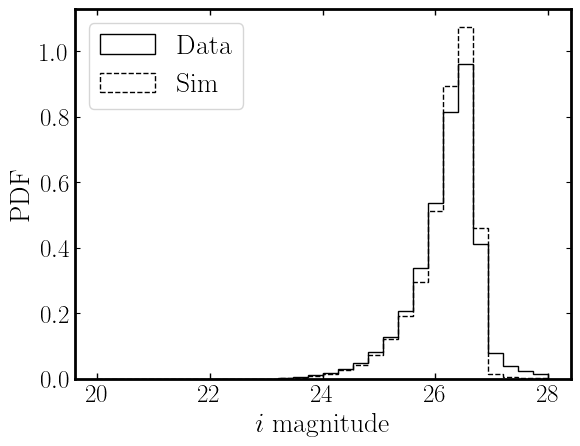

In [9]:
plt.close()
plt.hist(mag_data, bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim, bins=30, range=(20, 28), histtype="step", density=True, color="black", linestyle="--", label="Sim")
plt.legend()
plt.xlabel(r"$i$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

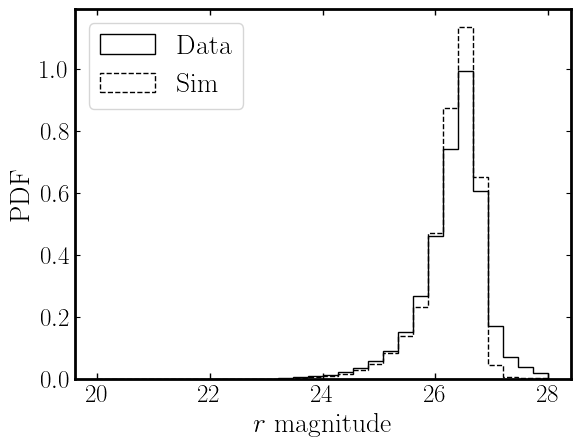

In [10]:
plt.hist(mag_data_r, bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim_r, bins=30, range=(20, 28), histtype="step", density=True, color="black", label="Sim", linestyle="--")
plt.legend()
plt.xlabel(r"$r$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

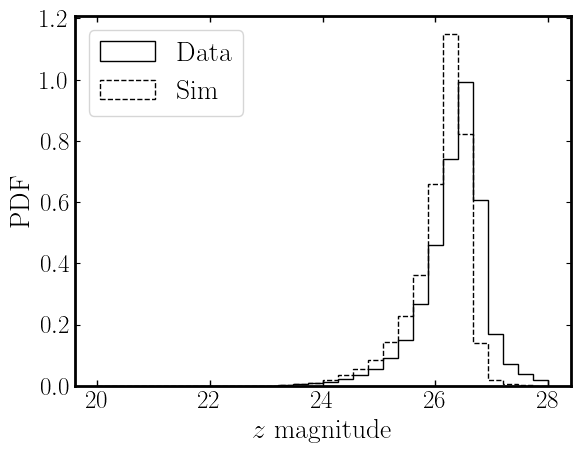

In [11]:
plt.hist(mag_data_z, bins=30, range=(20, 28), histtype="step", density =True, color="black", label="Data")
plt.hist(mag_sim_z, bins=30, range=(20, 28), histtype="step", density=True, color="black", label="Sim", linestyle="--")
plt.legend()
plt.xlabel(r"$z$ magnitude")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

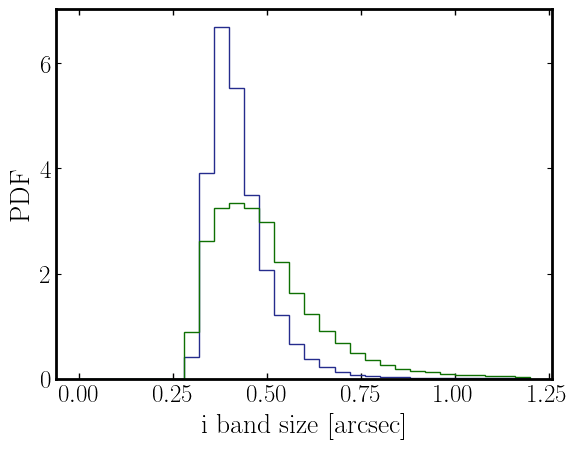

In [12]:
plt.close()
plt.hist(size_sim[msk_sim], bins=30, histtype="step", density=True, range=(0.0, 1.2))
plt.hist(size_data[msk_data], bins=30, histtype="step", density =True, range=(0.0, 1.2))
plt.xlabel("i band size [arcsec]")
plt.ylabel("PDF")

1.373946525127894


Text(0, 0.5, 'PDF')

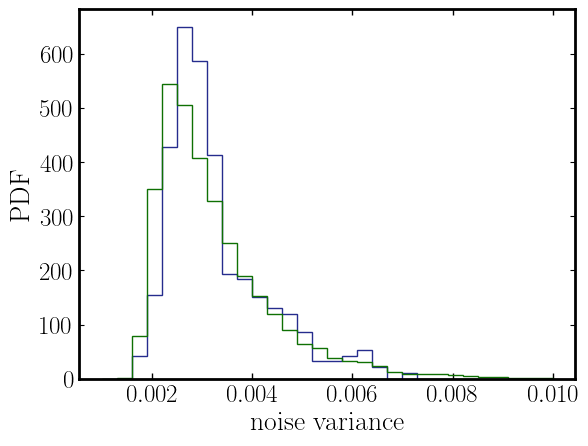

In [13]:
plt.close()
plt.hist(var_sim[msk_sim], bins=30, histtype="step", density=True, range=(1e-3, 1e-2))
plt.hist(var_data[msk_data], bins=30, histtype="step", density =True, range=(1e-3, 1e-2))
print(np.nanmean(var_sim[msk_sim]) / np.nanmean(var_data[msk_data]))
plt.xlabel("noise variance")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

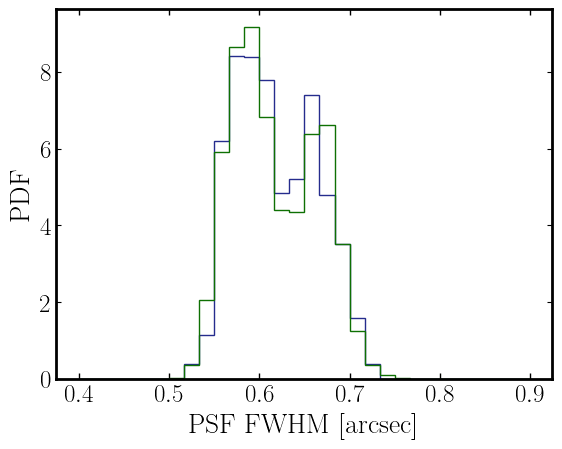

In [14]:
plt.close()
plt.hist(fwhm_sim, bins=30, histtype="step", density=True, range=(0.4, 0.9))
plt.hist(fwhm_data, bins=30, histtype="step", density =True, range=(0.4, 0.9))
plt.xlabel("PSF FWHM [arcsec]")
plt.ylabel("PDF")

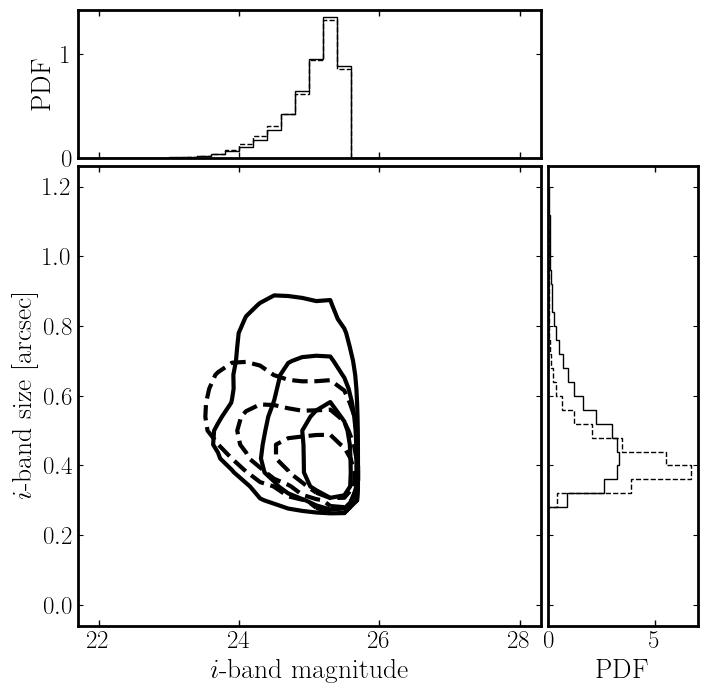

In [15]:
plt.close()
x_array = mag_sim[msk_sim]
y_array = size_sim[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = size_data[msk_data]

# Create figure and gridspec
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4, wspace=0.05, hspace=0.05)
# 2D Contour plot (central plot)
ax_2d = fig.add_subplot(gs[1:4, 0:3])
hist, xedges, yedges = np.histogram2d(
    x=x_array, y=y_array, bins=30,
    range=[[22, 28], [0.0, 1.2]],
    density=True,
)

hist_d, xedges, yedges = np.histogram2d(
    x=x_array_d, y=y_array_d, bins=30,
    range=[[22, 28], [0.0, 1.2]],
    density=True,
)

# Calculate the midpoints of bins
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xcenters, ycenters)

# Contour plot
contour = ax_2d.contour(X, Y, hist.T, levels=[0.1, 0.5, 2.0], colors="black", linestyles="--")
contour_d = ax_2d.contour(X, Y, hist_d.T, levels=[0.1, 0.5, 2.0], colors="black")
ax_2d.set_xlabel(r'$i$-band magnitude')
ax_2d.set_ylabel(r'$i$-band size [arcsec]')

# 1D Histogram (top plot)
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_2d)
ax_top.hist(x_array, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True, ls="--")
ax_top.hist(x_array_d, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True)
ax_top.set_ylabel('PDF')
ax_top.tick_params(axis="x", labelbottom=False)

# 1D Histogram (right plot)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_2d)
ax_right.hist(y_array, bins=30, histtype='step', 
              color='black', range=(0, 1.2), density=True, 
              orientation='horizontal', ls="--"
 )
ax_right.hist(y_array_d, bins=30, histtype='step', 
              color='black', range=(0, 1.2), density=True, 
              orientation='horizontal')
ax_right.set_xlabel('PDF')
ax_right.tick_params(axis="y", labelleft=False)

# Final adjustments
plt.tight_layout()

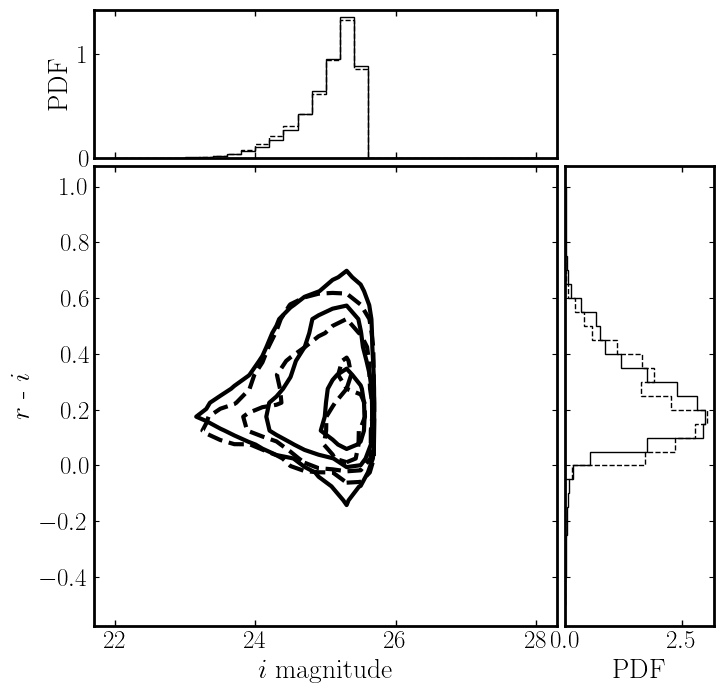

In [16]:
plt.close()

mag_sim_r = 27.0 - np.log10(flux_sim_r)
mag_data_r = 27.0 - np.log10(flux_data_r)

x_array = mag_sim[msk_sim]
y_array = mag_sim_r[msk_sim] - mag_sim[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = mag_data_r[msk_data] - mag_data[msk_data]

# Create figure and gridspec
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4, wspace=0.05, hspace=0.05)
# 2D Contour plot (central plot)
ax_2d = fig.add_subplot(gs[1:4, 0:3])
hist, xedges, yedges = np.histogram2d(
    x=x_array, y=y_array, bins=30,
    range=[[22, 28], [-0.5, 1.0]],
    density=True,
)

hist_d, xedges, yedges = np.histogram2d(
    x=x_array_d, y=y_array_d, bins=30,
    range=[[22, 28], [-0.5, 1.0]],
    density=True,
)

# Calculate the midpoints of bins
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xcenters, ycenters)

# Contour plot
contour = ax_2d.contour(X, Y, hist.T, levels=[0.1, 0.5, 2.0], colors="black", linestyles="--")
contour_d = ax_2d.contour(X, Y, hist_d.T, levels=[0.1, 0.5, 2.0], colors="black")
ax_2d.set_xlabel(r'$i$ magnitude')
ax_2d.set_ylabel(r'$r$ - $i$')

# 1D Histogram (top plot)
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_2d)
ax_top.hist(x_array, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True, ls="--")
ax_top.hist(x_array_d, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True)
ax_top.set_ylabel('PDF')
ax_top.tick_params(axis="x", labelbottom=False)

# 1D Histogram (right plot)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_2d)
ax_right.hist(y_array, bins=30, histtype='step', 
              color='black', range=(-0.5, 1.0), density=True, 
              orientation='horizontal', ls="--"
 )
ax_right.hist(y_array_d, bins=30, histtype='step', 
              color='black', range=(-0.5, 1.0), density=True, 
              orientation='horizontal')
ax_right.set_xlabel('PDF')
ax_right.tick_params(axis="y", labelleft=False)

# Final adjustments
plt.tight_layout()

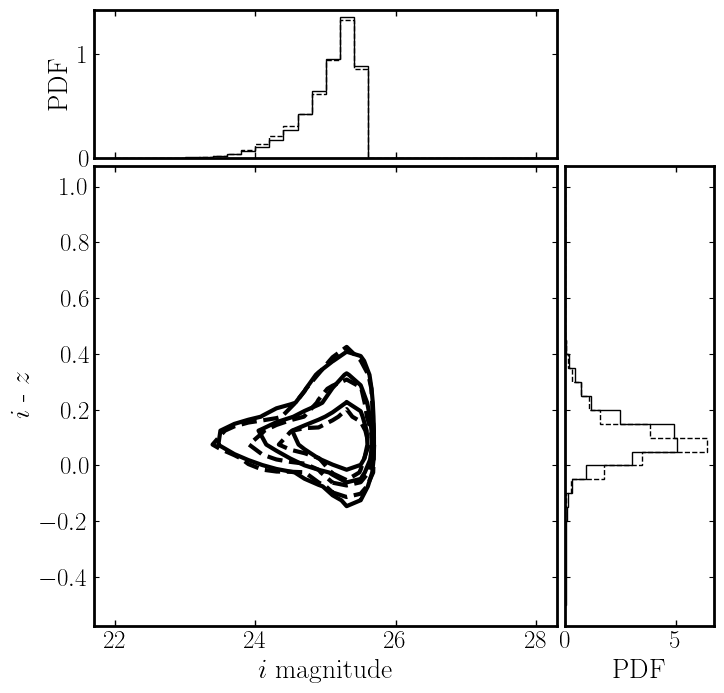

In [17]:
plt.close()

mag_sim_z = 27.0 - np.log10(flux_sim_z)
mag_data_z = 27.0 - np.log10(flux_data_z)

x_array = mag_sim[msk_sim]
y_array = mag_sim[msk_sim] - mag_sim_z[msk_sim]

x_array_d = mag_data[msk_data]
y_array_d = mag_data[msk_data] - mag_data_z[msk_data]

# Create figure and gridspec
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4, wspace=0.05, hspace=0.05)
# 2D Contour plot (central plot)
ax_2d = fig.add_subplot(gs[1:4, 0:3])
hist, xedges, yedges = np.histogram2d(
    x=x_array, y=y_array, bins=30,
    range=[[22, 28], [-0.5, 1.0]],
    density=True,
)

hist_d, xedges, yedges = np.histogram2d(
    x=x_array_d, y=y_array_d, bins=30,
    range=[[22, 28], [-0.5, 1.0]],
    density=True,
)

# Calculate the midpoints of bins
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xcenters, ycenters)

# Contour plot
contour = ax_2d.contour(X, Y, hist.T, levels=[0.2, 0.8, 2.0], colors="black", linestyles="--")
contour_d = ax_2d.contour(X, Y, hist_d.T, levels=[0.2, 0.8, 2.0], colors="black")
ax_2d.set_xlabel(r'$i$ magnitude')
ax_2d.set_ylabel(r'$i$ - $z$ ')

# 1D Histogram (top plot)
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_2d)
ax_top.hist(x_array, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True, ls="--")
ax_top.hist(x_array_d, bins=30, histtype='step', color='black', 
            range=(22, 28), density=True)
ax_top.set_ylabel('PDF')
ax_top.tick_params(axis="x", labelbottom=False)

# 1D Histogram (right plot)
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_2d)
ax_right.hist(y_array, bins=30, histtype='step', 
              color='black', range=(-0.5, 1.0), density=True, 
              orientation='horizontal', ls="--"
 )
ax_right.hist(y_array_d, bins=30, histtype='step', 
              color='black', range=(-0.5, 1.0), density=True, 
              orientation='horizontal')
ax_right.set_xlabel('PDF')
ax_right.tick_params(axis="y", labelleft=False)

# Final adjustments
plt.tight_layout()